<a href="https://colab.research.google.com/github/MatGam3r/Proyecto-Final/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
processDf = pd.read_excel('Datos.csv')
processDf.head()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
processDf = pd.read_csv('Datos.csv')
processDf.head()

,ID,Total,alimentaria,bebidas_y_tabaco,insumos_textiles,productos_textiles,prendas_de_vestir,productos_de_cuero,madera,papel,industrias_conexas,Productos_Petroleo,Quimica,Plastico,Metalicos,maquinaria_y_equipo,Computacion,comunicación,Mes,Inflacion
0,1,2.6,1.8,2.2,2.1,2.4,2.0,2.5,4.3,3.8,2.6,3.0,3.7,2.7,3.0,2.9,2.2,2.5,20191,4.37
1,2,2.6,1.9,2.3,2.2,2.2,2.1,2.5,5.1,4.2,2.7,3.1,3.8,2.7,3.2,3.0,2.3,2.6,20192,3.94
2,3,2.7,1.9,2.3,2.2,2.2,2.1,2.6,4.4,4.0,2.8,3.0,4.0,2.8,3.3,3.0,2.3,2.7,20193,4.00
3,4,2.7,1.9,2.4,2.3,2.2,2.1,2.5,4.5,4.0,2.7,3.1,3.9,2.8,3.3,3.0,2.2,2.6,20194,4.41
4,5,2.8,2.0,2.4,2.3,2.3,2.2,2.7,6.1,4.2,2.8,3.2,4.2,2.9,3.5,3.1,2.5,2.7,20195,4.28


In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("Datos.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(31, 20)

In [ ]:
data.head()

,ID,Total,alimentaria,bebidas_y_tabaco,insumos_textiles,productos_textiles,prendas_de_vestir,productos_de_cuero,madera,papel,industrias_conexas,Productos_Petroleo,Quimica,Plastico,Metalicos,maquinaria_y_equipo,Computacion,comunicación,Mes,Inflacion
0,1,2.6,1.8,2.2,2.1,2.4,2.0,2.5,4.3,3.8,2.6,3.0,3.7,2.7,3.0,2.9,2.2,2.5,20191,4.37
1,2,2.6,1.9,2.3,2.2,2.2,2.1,2.5,5.1,4.2,2.7,3.1,3.8,2.7,3.2,3.0,2.3,2.6,20192,3.94
2,3,2.7,1.9,2.3,2.2,2.2,2.1,2.6,4.4,4.0,2.8,3.0,4.0,2.8,3.3,3.0,2.3,2.7,20193,4.00
3,4,2.7,1.9,2.4,2.3,2.2,2.1,2.5,4.5,4.0,2.7,3.1,3.9,2.8,3.3,3.0,2.2,2.6,20194,4.41
4,5,2.8,2.0,2.4,2.3,2.3,2.2,2.7,6.1,4.2,2.8,3.2,4.2,2.9,3.5,3.1,2.5,2.7,20195,4.28


In [ ]:
data.describe()

,ID,Total,alimentaria,bebidas_y_tabaco,insumos_textiles,productos_textiles,prendas_de_vestir,productos_de_cuero,madera,papel,industrias_conexas,Productos_Petroleo,Quimica,Plastico,Metalicos,maquinaria_y_equipo,Computacion,comunicación,Mes,Inflacion
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.935484,2.687097,1.845161,2.258065,2.290323,2.216129,2.451613,2.570968,4.429032,3.864516,2.793548,3.106452,4.306452,2.861290,3.312903,3.180645,2.332258,2.658065,43657.322581,4.055161
std,9.862168,0.164807,0.133763,0.178464,0.351525,0.143983,1.191881,0.173577,0.551479,0.283488,0.180620,0.165198,0.482311,0.187399,0.182102,0.768297,0.185089,0.196255,61938.115523,1.050028
min,1.000000,2.400000,1.600000,1.900000,2.000000,1.900000,2.000000,2.300000,3.600000,3.300000,2.500000,2.800000,3.700000,2.500000,3.000000,2.600000,2.000000,2.400000,20191.000000,2.150000
25%,8.500000,2.600000,1.750000,2.200000,2.100000,2.100000,2.000000,2.450000,4.000000,3.650000,2.650000,3.000000,3.900000,2.700000,3.200000,2.900000,2.200000,2.500000,20198.500000,3.290000
50%,17.000000,2.700000,1.900000,2.300000,2.200000,2.200000,2.200000,2.600000,4.400000,3.900000,2.800000,3.100000,4.100000,2.800000,3.300000,3.000000,2.300000,2.600000,20207.000000,3.940000
75%,25.500000,2.800000,1.900000,2.400000,2.300000,2.350000,2.300000,2.700000,4.750000,4.100000,3.000000,3.250000,4.750000,3.000000,3.500000,3.200000,2.500000,2.800000,20215.500000,4.390000
max,33.000000,3.000000,2.100000,2.500000,3.600000,2.400000,7.500000,2.900000,6.100000,4.300000,3.100000,3.400000,5.100000,3.200000,3.700000,6.900000,2.700000,3.000000,202011.000000,6.080000


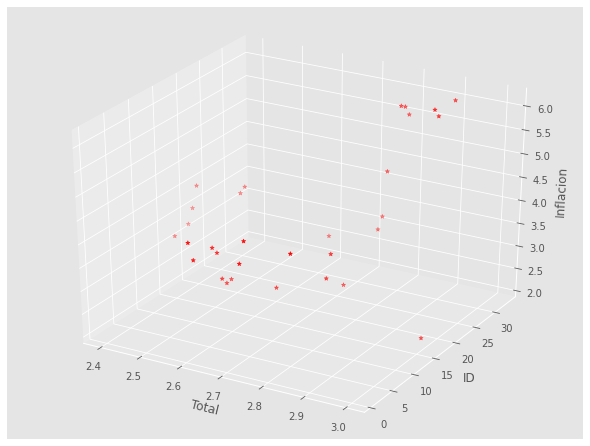

In [ ]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random 
fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

Total = processDf ["Total"]                             # Datos eje X
ID = processDf ["ID"]                            # Datos eje Y
Inflacion = processDf["Inflacion"]                               # Datos eje Z (Var. Respuesta)

ax.scatter(Total, ID, Inflacion, marker='*', c='r')
ax.set_xlabel('Total')        # Etiqueta del eje X
ax.set_ylabel('ID')       # Etiqueta del eje Y
ax.set_zlabel('Inflacion');        # Etiqueta del eje Z (Var. Respuesta) 

In [ ]:
mod = smf.ols('Inflacion ~ Total + ID', data=processDf).fit()

In [ ]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              Inflacion   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.971
Date:                Fri, 10 Dec 2021   Prob (F-statistic):            0.00349
Time:                        03:49:54   Log-Likelihood:                -38.729
No. Observations:                  31   AIC:                             83.46
Df Residuals:                      28   BIC:                             87.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2789      2.737      0.102      0.9

In [ ]:
mod.params

Intercept    0.340502
Total        0.814732
ID           0.007576
dtype: float64

In [ ]:
mod.mse_resid

0.008441651303409157

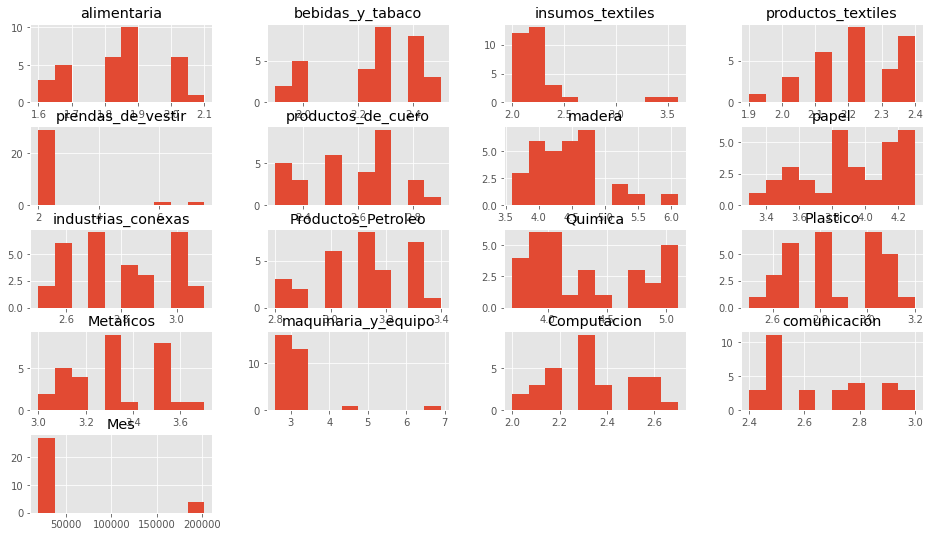

In [ ]:
data.drop(['Total','Inflacion', 'ID'],1).hist()
plt.show()

In [ ]:
plt.plot(df)

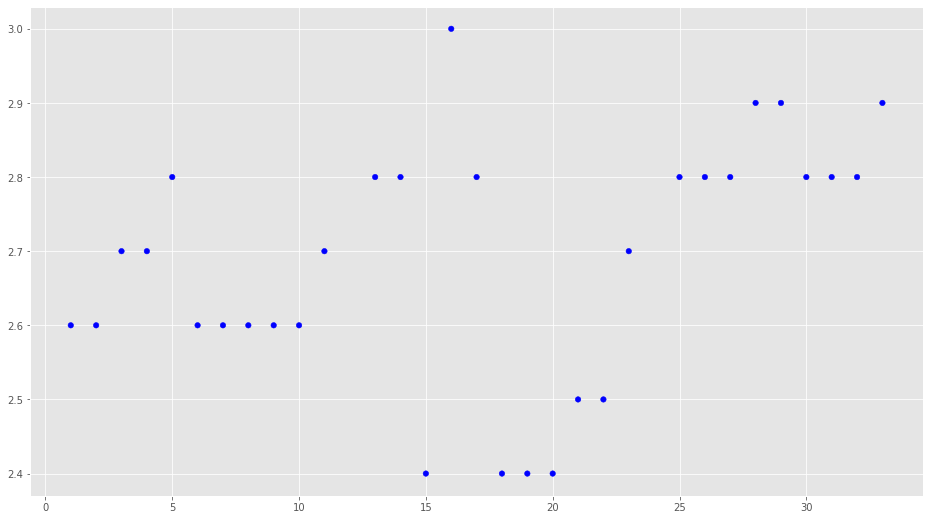

In [ ]:
# esto es en el eje X: entre 0 y 4
# y en el eje Y: entre 0 y 200
filtered_data = data[(data['ID'] <= 33) & (data['Total'] <= 200)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['ID'].values
f2 = filtered_data['Total'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['ID']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
dataX =filtered_data[["ID"]]
X_train = np.array(dataX)
y_train = filtered_data['Total'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.00585159]
Independent term: 
 2.5879972140535528
Mean squared error: 0.02
Variance score: 0.12


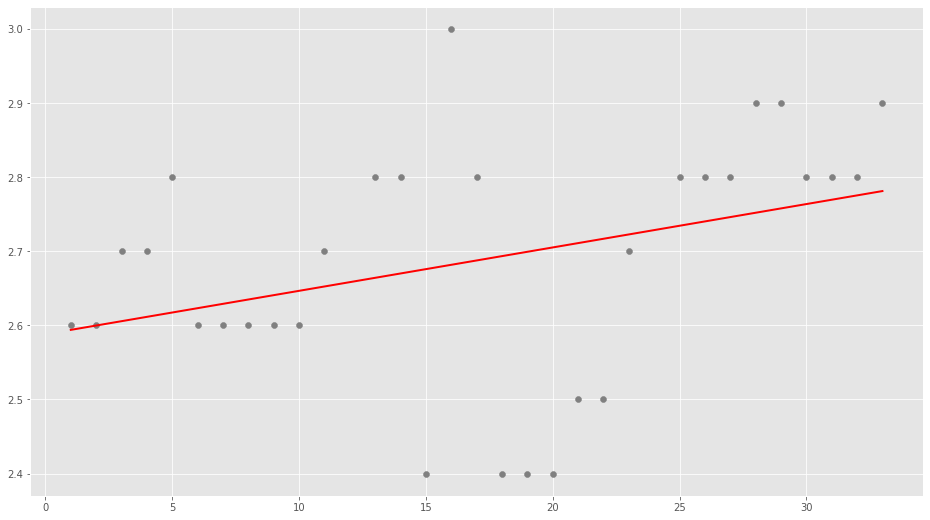

In [ ]:
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_train, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
#Vamos a comprobar:
# según nuestro modelo, hacemos:
y_Septiembre2022 = regr.predict([[49]])
print(float(y_Septiembre2022))

2.874725274725275


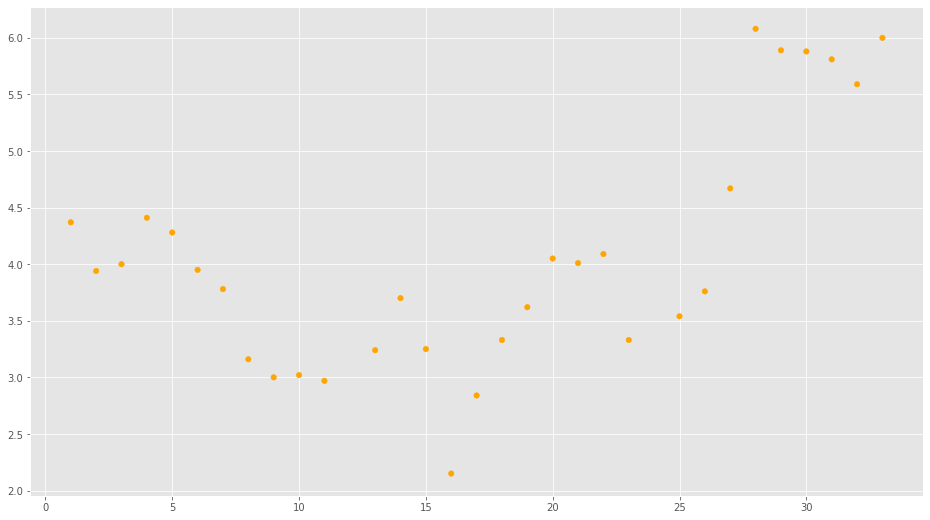

In [ ]:
# esto es en el eje X: entre 0 y 4
# y en el eje Y: entre 0 y 200
filtered_data = data[(data['ID'] <= 33) & (data['Inflacion'] <= 200)]
 
colores=['orange','orange']
tamanios=[30,60]
 
f3 = filtered_data['ID'].values
f4 = filtered_data['Inflacion'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['ID']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f3, f4, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
dataX =filtered_data[["ID"]]
X2_train = np.array(dataX)
y2_train = filtered_data['Inflacion'].values
 
# Creamos el objeto de Regresión Linear
regr2 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr2.fit(X2_train, y2_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y2_pred = regr2.predict(X2_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr2.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr2.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y2_train, y2_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y2_train, y2_pred))

Coefficients: 
 [0.05904316]
Independent term: 
 3.055236805448073
Mean squared error: 0.74
Variance score: 0.31


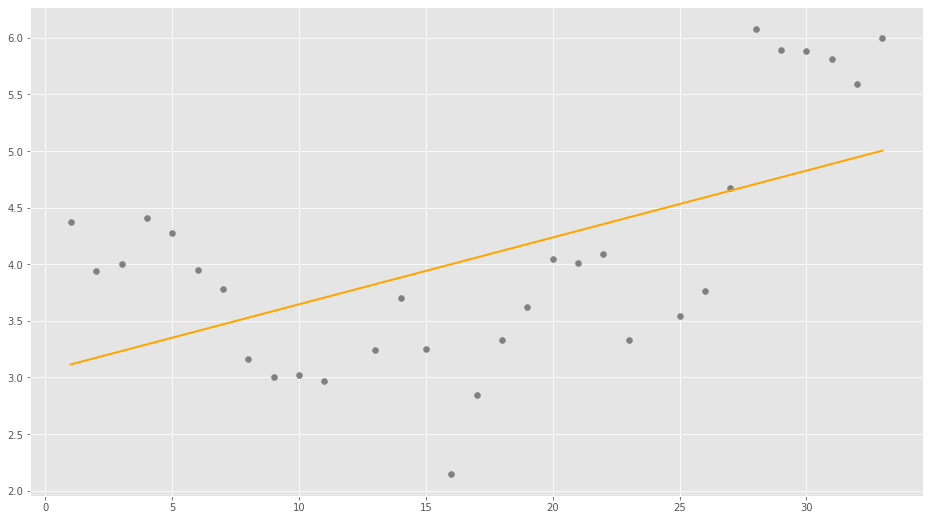

In [ ]:
plt.scatter(X2_train, y2_train,  color='gray')
plt.plot(X2_train, y2_pred, color='orange', linewidth=2)
plt.show()

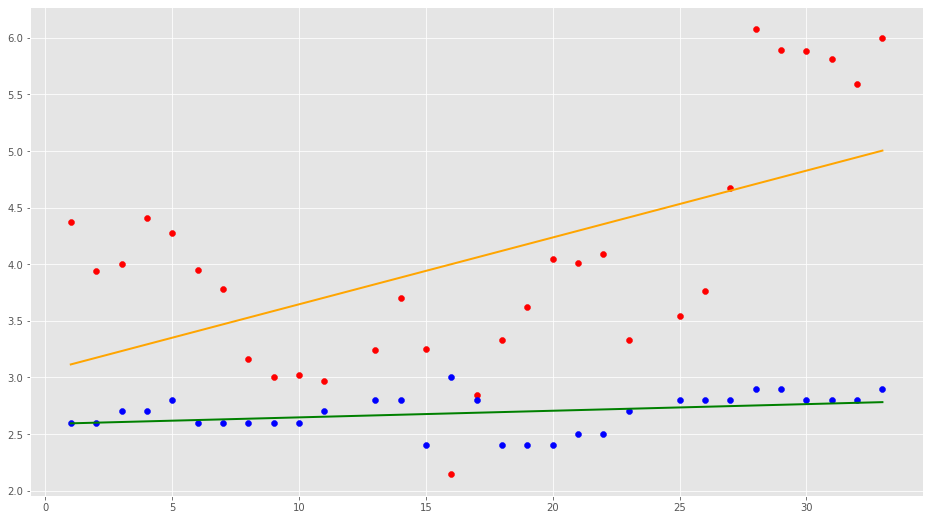

In [ ]:
plt.scatter(X2_train, y2_train,  color='red')
plt.plot(X2_train, y2_pred, color='orange', linewidth=2)
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, y_pred, color='green', linewidth=2)
plt.show()

In [ ]:
#Vamos a comprobar:
# según nuestro modelo, hacemos:
p =49
y_Inflacion2022 = regr2.predict([[p]])
print("Inflacion")
print(float(y_Inflacion2022))
y_Septiembre2022 = regr.predict([[p]])
print ("DolaresvsHora")
print(float(y_Septiembre2022))


Inflacion
5.9483516483516485
DolaresvsHora
2.874725274725275


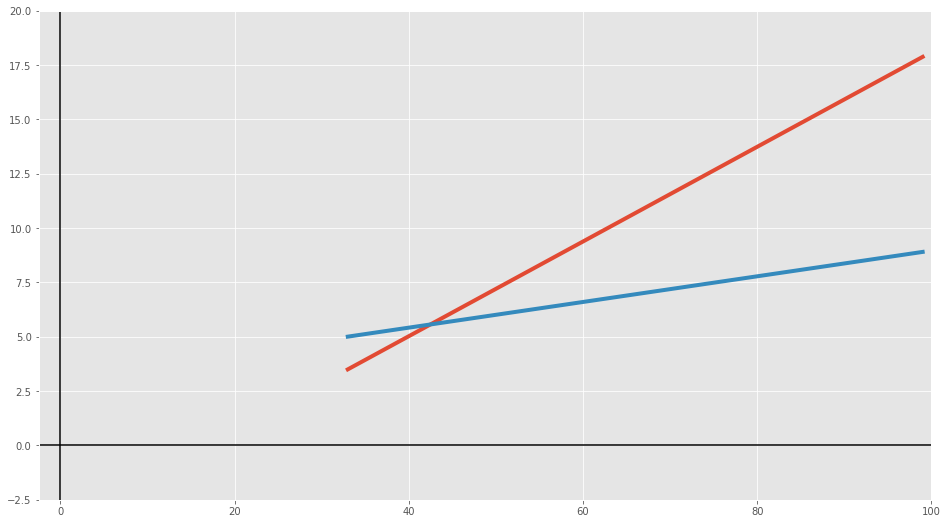

In [ ]:
def f1(x):
    return (((0.00585159*x + 2.5879972140535528) * 100)/2.6870968) - 100
# Función lineal.
def f2(x):
    return 0.05904316*x + 3.055236805448073
# Valores del eje X que toma el gráfico.
x = range(33, 100)
# Graficar ambas funciones.
pyplot.plot(x, [f1(i) for i in x] , linewidth=4)
pyplot.plot(x, [f2(i) for i in x], linewidth=4)
# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-2.5, 100)
pyplot.ylim(-2.5, 20)
# Guardar gráfico como imágen PNG.
pyplot.savefig("output.png")
# Mostrarlo.
pyplot.show()
#Funcion = 0.00585159 * x + 2.5879972140535528
#Coefficients: 
 #[0.00585159]
#Independent term: 
 #2.5879972140535528
 #Coefficients: 
 #[0.05904316]
#Independent term: 
 #3.055236805448073